# Final Project: Build a Regression Model in Keras

The objective of this project is to build a regression model using the Keras library to model data about concrete compressive strength. Based on inputs related to composition (Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate) and time (Age), we will create a model that can predict the concrete's compressive strength.

## Part A: Build a baseline model

The objective of this notebook is to use the Keras library to build a base neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error  as the loss function.

### Download and Clean Dataset

We'll start by importing the <em>pandas</em> and the Numpy libraries.

In [1]:
import pandas as pd
import numpy as np

Then we'll download and read the file.

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


We'll check the dataset for any missing values.

In [3]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

#### Split data into predictors and target
Then we'll separate the inputs from the output. The target variable in this problem is the concrete compressive strength. Our predictors are all the other columns.

In [5]:
X = concrete_data.iloc[:, :-1]  # Predictors
y = concrete_data.iloc[:, -1]   # Target

We'll double check the predictors and the target dataframes.

In [6]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, we'll save the number of predictors to a variable called n_cols so we can use it when building our model.

In [8]:
n_cols = X.shape[1] # number of predictors

### Build a Neural Network
First we'll import Keras and the packages we need to build our regression model.

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Now, we'll define a function that defines our regression model for us so that we can call it to create our model.

In [10]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

This function creates a model that has one hidden layer of 10 nodes that uses a ReLU activation function. The it uses the adam optimizer and the mean squared error as the loss function.

### Train and Test the Network

#### Instructions for Part A
1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_split helper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

Submit your Jupyter Notebook with your code and comments.

First, we'll import what we'll need from Scikit-learn.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


Then, we'll create a list of mean squared errors where we can save the values of the mean squared errors after each loop run so that we can calculate the mean and standard deviation of these.

In [12]:
mse_list = []

Now, we'll create a loop that allows us to cycle through this process 50 times. We will leave out 30% of the data for validation and we will train the model for 50 epochs. 

In [13]:
for i in range(50): #cycle through 5 times
    # Split data into trainng and testing data. Use a fixed random state to ensure reproducibility.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Print so humans can track which cycle the loop is on. Added 1 because most humans don't count starting at 0.
    print(f"Cycle:{i + 1}")
    
    # Call model
    model = regression_model()
    
    # Fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)
    
    # Evaluate model
    y_pred = model.predict(X_test)
    
    # Save mean-square error to list
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    
    
    

#share mean squared error and standard deviation
mean_mse = np.mean(mse_list)
std_mse = np.std(mse_list)

Cycle:1






Train on 721 samples, validate on 309 samples
Epoch 1/50


2024-08-12 17:28:19.375243: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2024-08-12 17:28:19.380166: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394300000 Hz
2024-08-12 17:28:19.380711: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562459d48ab0 executing computations on platform Host. Devices:
2024-08-12 17:28:19.380749: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2024-08-12 17:28:19.453284: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

 - 0s - loss: 642766.8923 - val_loss: 525037.7053
Epoch 2/50
 - 0s - loss: 441187.7033 - val_loss: 366577.5400
Epoch 3/50
 - 0s - loss: 310289.6696 - val_loss: 262275.2067
Epoch 4/50
 - 0s - loss: 223290.0947 - val_loss: 191579.0240
Epoch 5/50
 - 0s - loss: 164457.3654 - val_loss: 143714.2395
Epoch 6/50
 - 0s - loss: 124781.5402 - val_loss: 110640.9935
Epoch 7/50
 - 0s - loss: 96586.8412 - val_loss: 86387.8950
Epoch 8/50
 - 0s - loss: 75585.3208 - val_loss: 67947.3198
Epoch 9/50
 - 0s - loss: 59464.8801 - val_loss: 53684.5491
Epoch 10/50
 - 0s - loss: 47073.2667 - val_loss: 42749.7023
Epoch 11/50
 - 0s - loss: 37569.3583 - val_loss: 34372.6111
Epoch 12/50
 - 0s - loss: 30233.3852 - val_loss: 27831.8081
Epoch 13/50
 - 0s - loss: 24540.1235 - val_loss: 22763.0073
Epoch 14/50
 - 0s - loss: 20080.0540 - val_loss: 18834.1819
Epoch 15/50
 - 0s - loss: 16598.0444 - val_loss: 15660.7665
Epoch 16/50
 - 0s - loss: 13764.5823 - val_loss: 13109.3498
Epoch 17/50
 - 0s - loss: 11480.5701 - val_loss:

Finally, we'll print the list of mean squared errors and then, print the mean and standard deviations of these mean squared errors.

In [14]:
print(f"There are {len(mse_list)} mean squared errors: {mse_list}")
print(f"The mean of these mean squared errors is {np.around(mean_mse, decimals = 4)}")
print(f"The standard deviation of these mean squared errors is {np.around(std_mse, decimals = 4)}")

There are 50 mean squared errors: [306.7897895467475, 555.6087984329155, 447.8256915453473, 127.68244344134334, 1592.8890991098563, 797.3204769041553, 109.46227710422036, 132.3741012492185, 620.2939083172563, 494.3856425898866, 83.31815145861685, 134.2783486415656, 2228.4013204995294, 959.5886703826332, 241.59970527330387, 152.72949264544962, 94.89349520964139, 117.76684692214468, 79.67942657706183, 916.3687654443285, 1612.4319268067372, 625.0684311174206, 484.79436613357865, 112.19858336013313, 320.8760910193181, 130.4939005458154, 421.69578556830845, 132.2930943444797, 154.7443507081082, 440.20641741472303, 437.18095767983806, 196.42868147651848, 221.73241088722602, 121.55158258252904, 181.27322601691836, 159.28566632401078, 3345.7464526000226, 110.45359914626732, 115.16387674551896, 86.71076613519115, 1161.3084822402334, 471.86575361246116, 114.07725696153308, 114.48982366031417, 109.50941895256705, 927.1989891479567, 305.73018407377475, 1097.824510564807, 220.4529413163871, 200.920

We'll plot the mean square errors to better visualize the output.

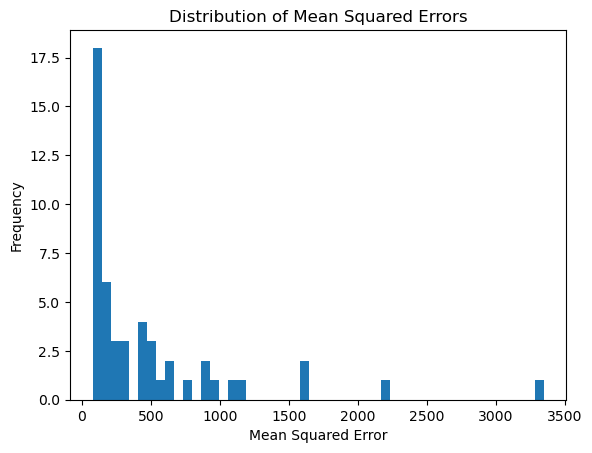

In [15]:
import matplotlib.pyplot as plt

# Plot distribution of mean squared errors
plt.hist(mse_list, bins=50)
plt.xlabel("Mean Squared Error")
plt.ylabel("Frequency")
plt.title("Distribution of Mean Squared Errors")
plt.show()

### Conclusions

The mean squared error values are high, which suggests that the model is not very good at predicting the concrete strength. 

The standard deviation is also high, which shows that the model's performance is highly variable across different training iterations.

Hopefully this is because the data is not normalized.